# Level Up: Exploring the World of Video Game Sales
***
Author: Kellie Leopold    
Date: February 18th, 2025  

#### *Purpose*
Conduct an exploratory data analysis (EDA) project on video game sales data. Use GitHub for version control, Git for collaboration, and Jupyter Notebook along with pandas, Seaborn, and other popular data analytics tools to analyze trends and insights. 

### *Introduction*
Welcome to the ultimate "press start" moment of our data analysis adventure!

In this exploration, we’re diving into the world of video game sales, where the numbers are as varied as the genres of games themselves. From Mario’s iconic leaps to the Fortnite dance craze, the gaming industry has seen its fair share of highs, lows, and unexpected twists.

Behind every sold-out console and record-breaking title, there’s a story waiting to be told through the data. How do game sales measure up across platforms and regions? Which titles had players hooked, and which consoles are leading the charge?

Grab your controller (or a cup of coffee) — we’re about to uncover the truth behind the numbers.

***

#### Imports
* pandas
* pathlib
* Seaborn
* matplotlib.pyplot

In [6]:
import pandas as pd # Handles data manipulation and analysis
import pathlib # Manipulates file and directory paths
import seaborn as sns # Simplifies complex visualizations
import matplotlib.pyplot as plt # Basic tools for plotting and visualizing data
import numpy as np # Used for arrays

#### 1. Load the Data
* Load the CSV dataset downloaded from Kaggle.
* Inspect the first few lines of data to ensure they loaded correctly.

In [7]:
# Load dataset into pandas DataFrame
game_df = pd.read_csv('vgchartz-2024.csv')

# Display basic information about the dataset
game_df.columns

# Display the first few rows of the DataFrame
game_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#### 2. Initial Data Inspection
* Get rid of the decimal point in the Year column.
* Display the first 10 rows of the DataFrame.
* Check the shape.
* Display the data types of each column.

In [8]:
# Convert Year column to int64 to get rid of the decimal point
game_df['Year'] = game_df['Year'].apply(lambda x: int(x) if pd.notnull(x) else x)
game_df['Year'] = game_df['Year'].astype('Int64')

# Display the DataFrame
display(game_df.head(10))

# Display the data shape
print("Data Shape:", game_df.shape)

# Display the data type
print("Data Types:\n", game_df.dtypes)

# Inspect the data types of the columns with info() method
game_df.info()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


Data Shape: (16598, 11)
Data Types:
 Rank              int64
Name             object
Platform         object
Year              Int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  Int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: Int64(1),

#### 3. Initial Descriptive Statistics
Displays summary statistics for each column.

In [9]:
# Check the summary statistics for numerical columns
print(game_df.describe())

# Show the number of unique values in each column
print(game_df.nunique())  

               Rank         Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000      16327.0  16598.000000  16598.000000  16598.000000   
mean    8300.605254  2006.406443      0.264667      0.146652      0.077782   
std     4791.853933     5.828981      0.816683      0.505351      0.309291   
min        1.000000       1980.0      0.000000      0.000000      0.000000   
25%     4151.250000       2003.0      0.000000      0.000000      0.000000   
50%     8300.500000       2007.0      0.080000      0.020000      0.000000   
75%    12449.750000       2010.0      0.240000      0.110000      0.040000   
max    16600.000000       2020.0     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max      

#### 4. Initial Data Distribution for Numerical Columns
* The first histogram displays data for the top five selling games across all regions.
* The remaining histograms show the top 10 selling games in 2024 for each region.

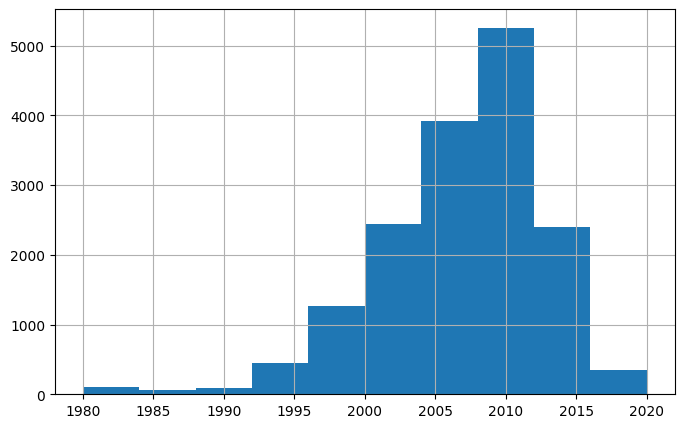

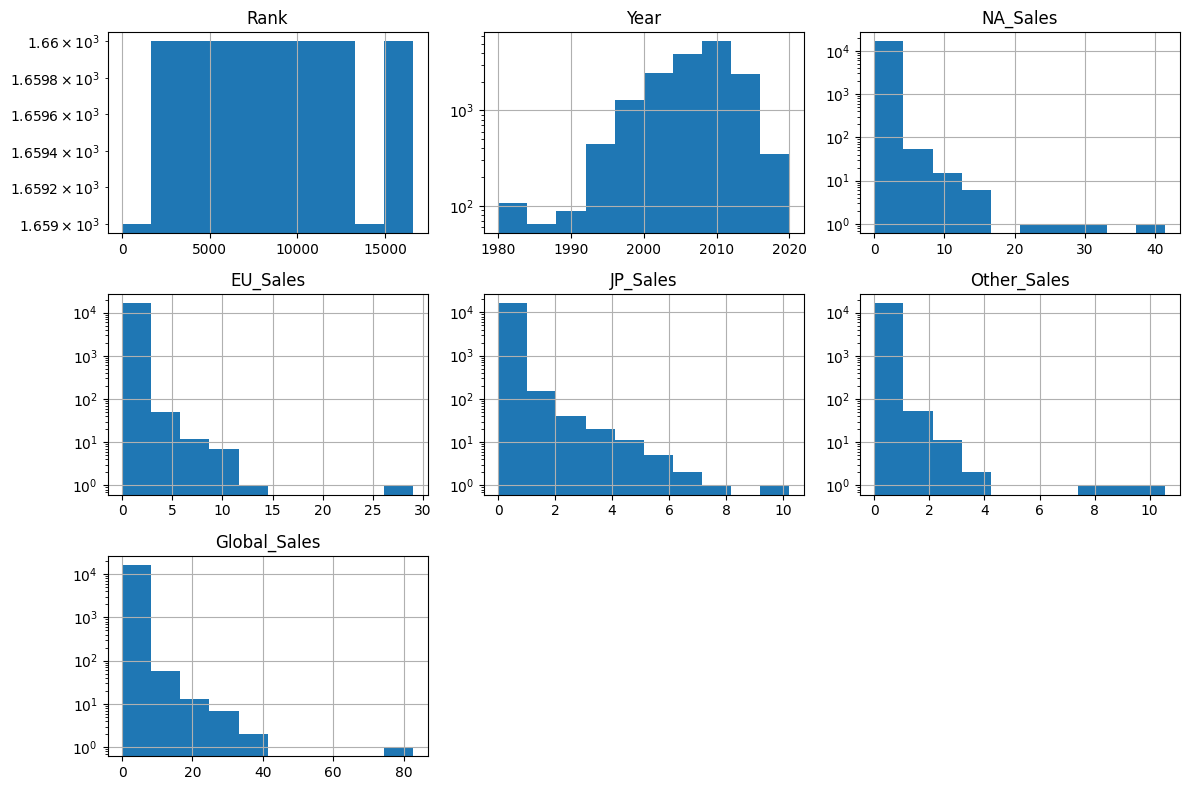

In [10]:
# Inspect histogram by numerical column
game_df['Year'].hist(figsize=(8,5))

# Plot histograms using a logarithmic scale for the x-axis
game_df.hist(figsize=(12, 8), bins=10, log=True)  # Log scale for better visualization
plt.tight_layout()
plt.show()